# QCoDeS example with NanoVNA H4
The [NanoVNA](https://nanovna.com/) is a USB-controlled vector network analyser. This driver was tested for version H4.
## Set up the instrument
1. Make sure you have QCoDeS set up (see the [QCoDeS website](https://microsoft.github.io/Qcodes/index.html) or my notebook [14 minutes to QCoDeS](https://github.com/lairdgrouplancaster/14-minutes-to-QCoDeS/blob/main/14_minutes_to_QCoDeS.ipynb)).
2. In your `qcodes` environment, install [pynanovna](https://pynanovna.readthedocs.io/en/latest/).
3. Plug the instrument into the USB interface of your computer and turn it on. A good testing configuration is to connect ports 1 and 2 via an SLP-100 filter.
4. Run the following code, and check that you get a connect message.

In [1]:
import qcodes as qc
from qcodes_contrib_drivers.drivers.NanoVNA.H4 import NanoVNA

qc.Instrument.close_all() # Closes all open instruments, in case there is a duplicate for any reason.
vna = NanoVNA("vna") # Should report something like: Connected to: NanoVNA NanoVNA (serial:None, firmware:1.2.27) in 1.94s

2026-02-11 19:30:28,564 - root - INFO - Initializing the VNA.
2026-02-11 19:30:28,864 - pynanovna.hardware.Hardware - INFO - Finding firmware variant...
2026-02-11 19:30:29,876 - root - INFO - VNA successfully initialized.
2026-02-11 19:30:30,296 - pynanovna.hardware.Hardware - INFO - Finding firmware variant...
2026-02-11 19:30:30,421 - qcodes.instrument.instrument_base - INFO - [vna(NanoVNA)] Connected to instrument: {'vendor': 'NanoVNA', 'model': 'NanoVNA', 'serial': None, 'firmware': '1.2.27'}


Connected to: NanoVNA NanoVNA (serial:None, firmware:1.2.27) in 1.86s


## Initialise QCoDeS control

In [2]:
from qcodes.station import Station
from qcodes.dataset import (
    do0d,
    do1d,
    do2d,
    initialise_database,
    initialise_or_create_database_at,
    load_or_create_experiment,
    Measurement,
    plot_by_id
)

# create an empty database based on the config file
qc.initialise_or_create_database_at('./test_vna.db')
exp = load_or_create_experiment(experiment_name='testing_NanoVNA',
                          sample_name="low_pass_filter")
station = qc.Station(vna)

2026-02-11 19:30:30,861 - pynanovna.hardware.Hardware - INFO - Finding firmware variant...
2026-02-11 19:30:31,483 - root - CRITICAL - No calibration has been applied, it is strongly recommended to calibrate you NanoVNA.
2026-02-11 19:30:31,485 - root - CRITICAL - 1 port calibration not valid, it is recommended to re-calibrate.
2026-02-11 19:30:31,487 - root - CRITICAL - 2 port calibration not valid, it is recommended to re-calibrate.


In my setup, I get the error `634 - root - CRITICAL - No calibration has been applied, it is strongly recommended to calibrate you NanoVNA.` This happens even when I have manually calibrated the instrument; I don't know how to avoid this.
## Connect to the instrument and make some measurements

2026-02-11 19:30:31,496 - qcodes.dataset.measurements - INFO - Registered vna_frequency in the Measurement.
2026-02-11 19:30:31,497 - qcodes.dataset.measurements - INFO - Registered vna_s11_real in the Measurement.
2026-02-11 19:30:31,498 - qcodes.dataset.measurements - INFO - Registered vna_s11_imag in the Measurement.
2026-02-11 19:30:31,499 - qcodes.dataset.measurements - INFO - Registered vna_s11_mag_db in the Measurement.
2026-02-11 19:30:31,499 - qcodes.dataset.measurements - INFO - Registered vna_s11_mag_lin in the Measurement.
2026-02-11 19:30:31,500 - qcodes.dataset.measurements - INFO - Registered vna_s11_phase in the Measurement.
2026-02-11 19:30:31,501 - qcodes.dataset.measurements - INFO - Registered vna_s21_real in the Measurement.
2026-02-11 19:30:31,501 - qcodes.dataset.measurements - INFO - Registered vna_s21_imag in the Measurement.
2026-02-11 19:30:31,502 - qcodes.dataset.measurements - INFO - Registered vna_s21_mag_db in the Measurement.
2026-02-11 19:30:31,503 - qc

Starting experimental run with id: 15. 


2026-02-11 19:30:32,444 - root - CRITICAL - No calibration has been applied, it is strongly recommended to calibrate you NanoVNA.
2026-02-11 19:30:32,445 - root - CRITICAL - 1 port calibration not valid, it is recommended to re-calibrate.
2026-02-11 19:30:32,445 - root - CRITICAL - 2 port calibration not valid, it is recommended to re-calibrate.
2026-02-11 19:30:32,464 - qcodes.dataset.measurements - INFO - Finished measurement with guid: a554923d-0000-0000-0000-019c4e2f09d2. 


([<Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_real'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_imag'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_mag_db (dB)'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_mag_lin'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_phase (rad)'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s21_real'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s21_imag'>,
  <Axes: title={'center': 'Run #15, Experiment testing_NanoVNA (low_pass_

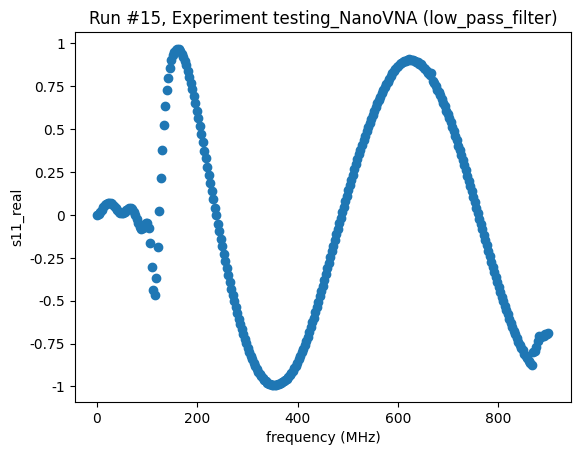

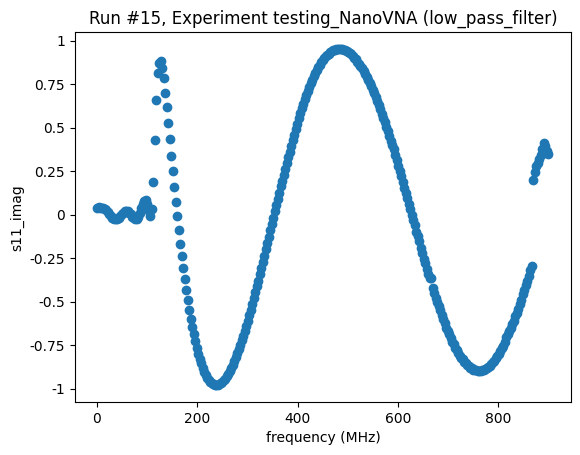

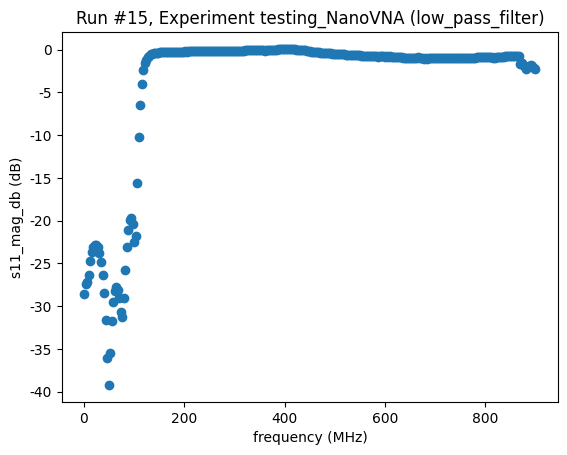

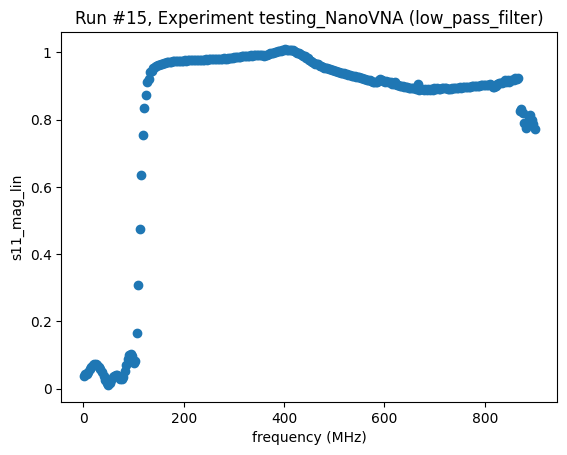

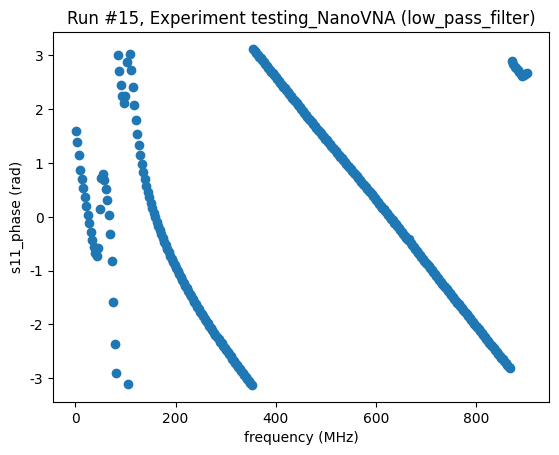

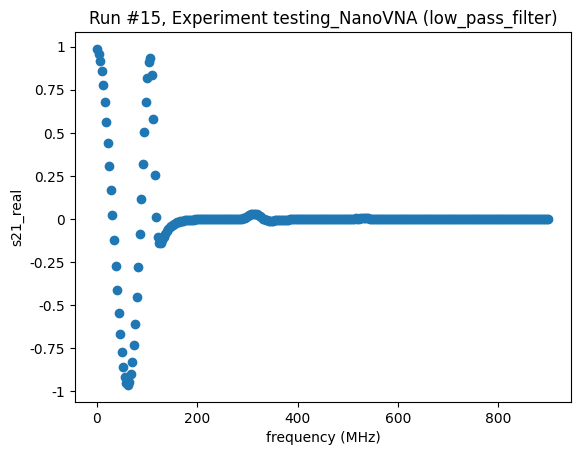

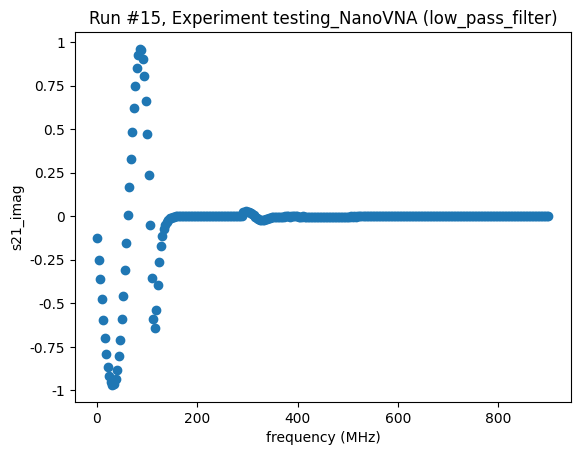

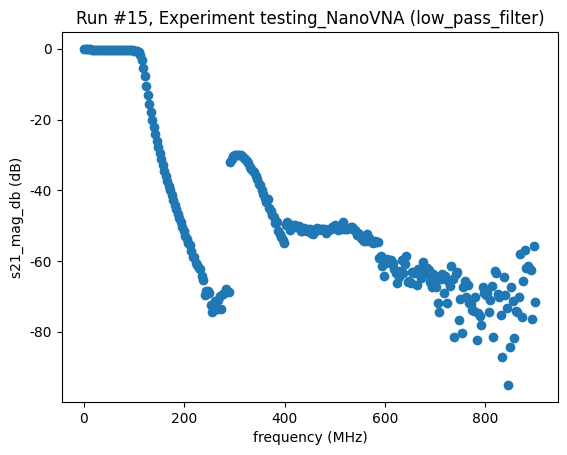

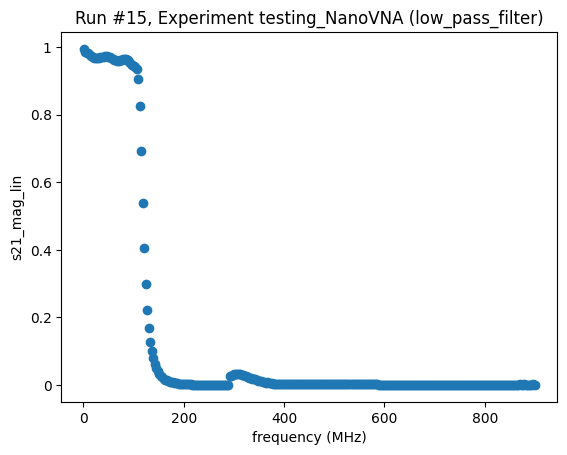

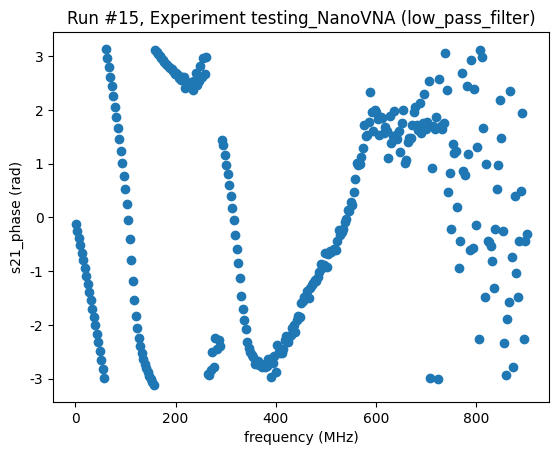

In [3]:
vna.start_freq(1e6)
vna.stop_freq(900e6)
vna.npts(301)

meas = Measurement()
meas.register_parameter(vna.frequency)
meas.register_parameter(vna.s11_real)
meas.register_parameter(vna.s11_imag)
meas.register_parameter(vna.s11_mag_db)
meas.register_parameter(vna.s11_mag_lin)
meas.register_parameter(vna.s11_phase)
meas.register_parameter(vna.s21_real)
meas.register_parameter(vna.s21_imag)
meas.register_parameter(vna.s21_mag_db)
meas.register_parameter(vna.s21_mag_lin)
meas.register_parameter(vna.s21_phase)


with meas.run() as datasaver:
    datasaver.add_result(
        (vna.frequency, vna.frequency()),
        (vna.s11_real, vna.s11_real()),
        (vna.s11_imag, vna.s11_imag()),
        (vna.s11_mag_db, vna.s11_mag_db()),
        (vna.s11_mag_lin, vna.s11_mag_lin()),
        (vna.s11_phase, vna.s11_phase()),        
        (vna.s21_real, vna.s21_real()),
        (vna.s21_imag, vna.s21_imag()),
        (vna.s21_mag_db, vna.s21_mag_db()),
        (vna.s21_mag_lin, vna.s21_mag_lin()),
        (vna.s21_phase, vna.s21_phase()),
    )

plot_by_id(datasaver.run_id)

## Do a QCoDeS sweep, measuring the magnitudes of S11 and S12

2026-02-11 19:30:33,185 - qcodes.dataset.measurements - INFO - Registered vna_s11_mag_db in the Measurement.
2026-02-11 19:30:33,186 - qcodes.dataset.measurements - INFO - Registered vna_frequency in the Measurement.
2026-02-11 19:30:33,187 - qcodes.dataset.measurements - INFO - Registered vna_s21_mag_db in the Measurement.
2026-02-11 19:30:33,187 - qcodes.dataset.dond.do_nd - INFO - Starting a doNd with scan with
 setpoints: (),
 measuring: (<qcodes.parameters.parameter_with_setpoints.ParameterWithSetpoints: s11_mag_db at 2735099484816>, <qcodes.parameters.parameter_with_setpoints.ParameterWithSetpoints: s21_mag_db at 2735099486736>)
2026-02-11 19:30:33,196 - qcodes.dataset.sqlite.queries - INFO - Created run with guid: d3f24f1f-0000-0000-0000-019c4e2f1065 in database C:\Users\lairde\OneDrive - Lancaster University\Desktop\Sandpit\test_vna.db
2026-02-11 19:30:33,212 - qcodes.dataset.sqlite.queries - INFO - Set the run_timestamp of run_id 16 to 1770838233.2120826
2026-02-11 19:30:33,21

Starting experimental run with id: 16. Using 'qcodes.dataset.do0d'


(results #16@C:\Users\lairde\OneDrive - Lancaster University\Desktop\Sandpit\test_vna.db
 ---------------------------------------------------------------------------------------
 vna_frequency - array
 vna_s11_mag_db - array
 vna_s21_mag_db - array,
 (<Axes: title={'center': 'Run #16, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s11_mag_db (dB)'>,
  <Axes: title={'center': 'Run #16, Experiment testing_NanoVNA (low_pass_filter)'}, xlabel='frequency (MHz)', ylabel='s21_mag_db (dB)'>),
 (None, None))

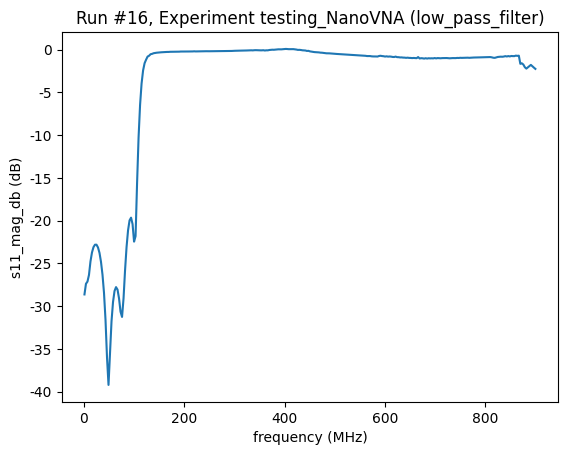

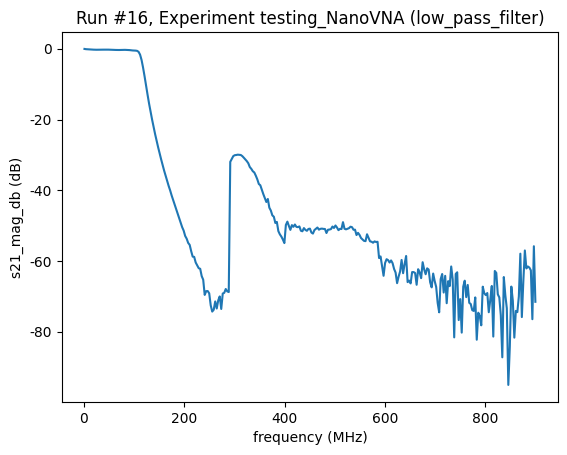

In [4]:
do0d(vna.s11_mag_db, vna.s21_mag_db, do_plot=True)

## Close the connection

In [5]:
vna.close()

2026-02-11 19:28:59,932 - pynanovna.hardware.VNABase - INFO - disconnect COM4 (NanoVNA)
